*   Multimídia - Imagem II (Exercício 2)

*   Felipe Daniel Dias dos Santos - 11711ECP004

*   Graduação em Engenharia de Computação - Faculdade de Engenharia Elétrica - Universidade Federal de Uberlândia

In [ ]:
#Função que calcula o limiar automático de uma imagem, ou sub-imagem, através das médias da distribuição Gaussiana
def autThreshold(M):

  #Obtenção das dimensões da imagem
  n_rows, n_columns = M.shape

  #Limiar inicial
  T = np.sum(M) / (n_columns * n_rows) 
  
  #Declaração das médias
  mean_1 = mean_2 = 0.0

  #Declaração da variável de verificação da condição estabelecida
  cond = 0

  #Conjuntos da imagem particionada
  R1 = R2 = []
  
  #Laço que atualiza o valor do limiar em relação a atualização das médias das duas sub-imagens
  while cond == 0:

    #Laço que percorre a imagem e a divide em 2 partes, de acordo com o valor corrente do limiar
    for i in range(n_rows):

      for j in range(n_columns):

        if M[i, j] < T:

          R1.append(M[i, j])
        
        else:

          R2.append(M[i, j])

    #Atualização dos valores das médias dos dois grupos de imagens
    mean_1 = np.sum(R1) / len(R1)
    mean_2 = np.sum(R2) / len(R2)

    T_old = T

    #Atualização do valor do limiar
    T = (mean_1 + mean_2) / 2

    #Verificação da condição estabelecida: se o limiar não tiver uma mudança significativa, o laço é interrompido e o limiar corrente é retornado
    if np.abs(T - T_old) <= 0.00005:

      cond = 1
    
    R1 = R2 = []

  return round(T)

In [ ]:
#Função que realiza a segmentação de uma imagem armazanada em uma matriz "M" de acordo com um limiar "T", retornando uma imagem binária
def segment(M, T):

  #Obtenção das dimensões da imagem
  n_rows, n_columns = M.shape
    
  #Declaração da imagem binária de saída  
  bin = np.empty(M.shape)

  #Laço que percorre a imagem e analisa quais pixels são maiores e quais são menores que o limiar definido, atriuindo 1 e 0 aos elementos
  for i in range(n_rows):

    for j in range(n_columns):

      if M[i, j] > T:

        bin[i, j] = 255
        
      else:

        bin[i, j] = 0
  
  return bin

In [ ]:
#Função que realiza a partição de uma imagem armazanada em uma matriz "M" de acordo com a quantidade de divisões das linhas ("p_rows") e das colunas ("p_columns")
#Logo, a imagem será dividida em "p_rows * p_columns" partes
def part(M, p_rows, p_columns):

  #Obtenção das dimensões da imagem
  n_rows, n_columns = M.shape

  #Janela escolhida para a partição da imagem
  i_window = round(n_rows / p_rows) + 1
  j_window = round(n_columns / p_columns) + 1

  #Lista que armazenará as sub-imagens
  img_list = []

  #Obtenção das partes da imagem para posterior análise
  for i in range(0, n_rows, i_window):

    for j in range (0, n_columns, j_window):

      img_list.append(M[i : i + i_window, j : j + j_window])
  
  return img_list

In [ ]:
#Função que realiza a junção de um conjunto de sub-imagens "sub", dada as dimensões da imagem original "M" e da quantidade de divisões verticais e horizontais
def join(M, sub, div_hor, div_vert):

  #Obtenção das dimensões da imagem
  n_rows, n_columns = M.shape

  #Matriz final, que armazenará a junção do conjunto de imagens
  M_final = np.empty(M.shape)

  #Janela da partição da imagem
  i_window = round(n_rows / div_hor) + 1
  j_window = round(n_columns / div_vert) + 1

  k = 0

  #Junção das imagens de "sub" em uma matriz "M"
  for i in range(0, n_rows, i_window):

    for j in range (0, n_columns, j_window):

      M_final[i : i + i_window, j : j + j_window] = sub[k]

      k += 1

  return M_final

O programa a seguir utilizará as funções definidas anteriormente para realizar uma limiarização local adaptativa em um grupo de 3 imagens em nível de cinza, onde cada imagem:

Será divida em um grupo de sub-imagens pela função "part";

Cada sub-imagem passará pelo processo de cálculo do limiar pela função "autThreshold";

Cada sub-imagem passará pelo processo de limiarização a partir do limiar calculado pela função "segment";

Finalmente, o grupo de sub-imagens será reunido novamente para a construção da imagem original segmentada pela função "join". 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


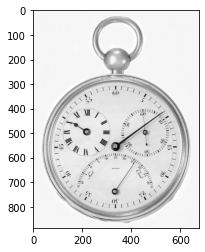

In [ ]:
#Imagem 01

#Declaração das bibliotecas necessárias, definição do diretório raíz e montagem do diretório
from google.colab import drive
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from numpy import asarray
from PIL import ImageOps

drive.mount('/content/gdrive')

root_path = '/content/gdrive/My Drive/Colab Notebooks/dados/threshold/'

#Carregamento da imagem
im = Image.open(root_path + 'relogio300.tif')

#Convertendo a imagem em matriz
pixel = asarray(im)

#Mostrar imagem original
plt.imshow(im, 'gray', origin = 'upper')
plt.show()

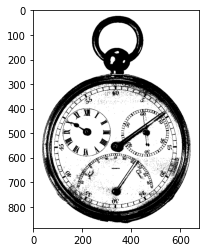

In [ ]:
#Imagem 01

#Definição da partição horizontal e vertical: 12 partições horizontais e 2 verticais, resultando em 24 sub-imagens que serão segmentadas separadamente
div_hor = 12
div_vert = 2

#Partição da imagem com a função "part"
#Será obtida uma lista de matrizes, onde cada posição irá armazenar uma sub-imagem da imagem original
img_list = part(pixel, div_hor, div_vert)

#Lista que armazenará as sub-imagens segmentadas utilizando o limiar calculado pela função "autThreshold"
sub = []

#Obtenção das sub-imagens segmentadas
for i in range(len(img_list)):

  #A lista sub será preenchida pelas sub-imagens segmentadas, onde as sub-imagens estão armazenadas no vetor "img_list"
  sub.append(segment(img_list[i], autThreshold(img_list[i])))

#Junção do grupo de sub-imagens segmentada em uma só matriz resultante
M_final = join(pixel, sub, div_hor, div_vert)

#Conversão da matriz resultante para imagem
im_final = Image.fromarray(M_final)

#Mostrar a imagem segmentada
plt.imshow(im_final, 'gray', origin = 'upper')
plt.show()

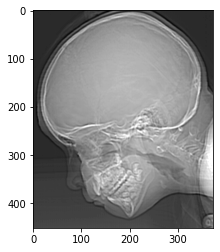

In [ ]:
#Imagem 02

#Carregamento da imagem
im = Image.open(root_path + 'imagem_teste.tif')

#Convertendo a imagem em matriz
pixel = asarray(im)

#Mostrar imagem original
plt.imshow(im, 'gray', origin = 'upper')
plt.show()

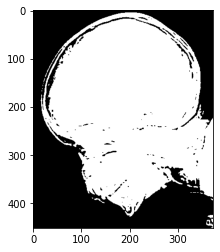

In [ ]:
#Imagem 02

#Definição da partição horizontal e vertical: 2 partições horizontais e nenhuma vertical, resultando em 2 sub-imagens que serão segmentadas separadamente
div_hor = 2
div_vert = 1

#Partição da imagem com a função "part"
#Será obtida uma lista de matrizes, onde cada posição irá armazenar uma sub-imagem da imagem original
img_list = part(pixel, div_hor, div_vert)

#Lista que armazenará as sub-imagens segmentadas utilizando o limiar calculado pela função "limiar_aut"
sub = []

#Obtenção das sub-imagens segmentadas
for i in range(len(img_list)):

  #A lista sub será preenchida pelas sub-imagens segmentadas, onde as sub-imagens estão armazenadas no vetor "img_list"
  sub.append(segment(img_list[i], autThreshold(img_list[i])))

#Junção do grupo de sub-imagens segmentada em uma só matriz resultante
M_final = join(pixel, sub, div_hor, div_vert)

#Conversão da matriz resultante para imagem
im_final = Image.fromarray(M_final)

#Mostrar a imagem segmentada
plt.imshow(im_final, 'gray', origin = 'upper')
plt.show()

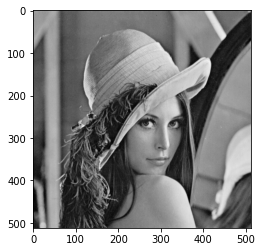

In [ ]:
#Imagem 03

#Carregamento da imagem
im = Image.open(root_path + 'lena.tiff')

#Convertendo a imagem em matriz
pixel = asarray(im)

#Mostrar imagem original
plt.imshow(im, 'gray', origin = 'upper')
plt.show()

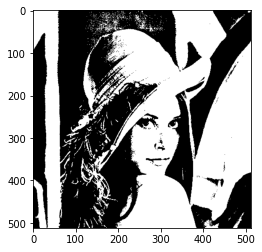

In [ ]:
#Imagem 03

#Definição da partição horizontal e vertical: 512 partições horizontais e nenhuma vertical, resultando em 512 sub-imagens que serão segmentadas separadamente
div_hor = 512
div_vert = 1

#Partição da imagem com a função "part"
#Será obtida uma lista de matrizes, onde cada posição irá armazenar uma sub-imagem da imagem original
img_list = part(pixel, div_hor, div_vert)

#Lista que armazenará as sub-imagens segmentadas utilizando o limiar calculado pela função "limiar_aut"
sub = []

#Obtenção das sub-imagens segmentadas
for i in range(len(img_list)):

  #A lista sub será preenchida pelas sub-imagens segmentadas, onde as sub-imagens estão armazenadas no vetor "img_list"
  sub.append(segment(img_list[i], autThreshold(img_list[i])))

#Junção do grupo de sub-imagens segmentada em uma só matriz resultante
M_final = join(pixel, sub, div_hor, div_vert)

#Conversão da matriz resultante para imagem
im_final = Image.fromarray(M_final)

#Mostrar a imagem segmentada
plt.imshow(im_final, 'gray', origin = 'upper')
plt.show()

É notável a melhora da segmentação das imagens em relação ao método manual de limiarização global ou limiarização local com poucas partições, explorados no exercício anterior. Nesse caso, a limiarização automática nos permite obter um valor de Threshold mais preciso. Além disso, como não é mais necessário realizar uma observação nos histogramas das sub-imagens ou um processo de tentativa e erro, mais partições podem ser realizadas, de modo a obter um resultado mais satisfatório.